In [1]:
#Task 1 Data Retrieving

In [2]:
import codecs
import pandas as pd
import numpy as np
import csv
from StringIO import StringIO
import matplotlib.pyplot as plt

In [3]:
with codecs.open('Wholesale customers data.csv', 'r') as f:
    customer_file = f.read()

In [4]:
customer=pd.read_csv(StringIO(customer_file),  encoding='utf-8', quoting=csv.QUOTE_NONNUMERIC)

In [5]:
#Checking loaded Data
print(customer.shape)

(440, 8)


In [6]:
customer.dtypes

Channel             float64
Region              float64
Fresh               float64
Milk                float64
Grocery             float64
Frozen              float64
Detergents_Paper    float64
Delicassen          float64
dtype: object

In [7]:
#Replacing Channel data with relavent label
customer['Channel']=customer['Channel'].replace(1,"horeca")
customer['Channel']=customer['Channel'].replace(2,"retail")
#Replacing Region data with relavent label
customer['Region'].replace(1, "lisbon", inplace=True)
customer['Region'].replace(2, "oporto", inplace=True)
customer['Region'].replace(3, "other_regon", inplace=True)

In [8]:
#updating data type for column Channel and Region
for col in ['Channel', 'Region']:
    customer[col] = customer[col].astype('category')

In [9]:
customer.dtypes

Channel             category
Region              category
Fresh                float64
Milk                 float64
Grocery              float64
Frozen               float64
Detergents_Paper     float64
Delicassen           float64
dtype: object

In [10]:
#checking for typo
for col in customer.columns:
    if (customer[col].dtype.name == 'category'):
        print customer[col].value_counts(), '\n'

horeca    298
retail    142
Name: Channel, dtype: int64 

other_regon    316
lisbon          77
oporto          47
Name: Region, dtype: int64 



In [11]:
for col in customer.columns:
    if (customer[col].dtype.name in ['category', 'str', 'object']):
        # Check for extra whitespaces and remove them
        customer[col] = customer[col].str.strip()
        # Cast text to lower-case
        customer[col] = customer[col].str.lower()

In [12]:
#checking for null values
null_columns=customer.columns[customer.isnull().any()] 
customer[null_columns].isnull().sum()

Series([], dtype: float64)

In [13]:
customer.describe().round(0)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.0,440.0,440.0,440.0,440.0,440.0
mean,12000.0,5796.0,7951.0,3072.0,2881.0,1525.0
std,12647.0,7380.0,9503.0,4855.0,4768.0,2820.0
min,3.0,55.0,3.0,25.0,3.0,3.0
25%,3128.0,1533.0,2153.0,742.0,257.0,408.0
50%,8504.0,3627.0,4756.0,1526.0,816.0,966.0
75%,16934.0,7190.0,10656.0,3554.0,3922.0,1820.0
max,112151.0,73498.0,92780.0,60869.0,40827.0,47943.0


In [14]:
print("Skewness: %f" % customer['Fresh'].skew())
print("Kurtosis: %f" % customer['Fresh'].kurt())

Skewness: 2.561323
Kurtosis: 11.536408


In [15]:
print('Skewness of each feature:')
pd.DataFrame.skew(customer, axis=0).round(2)

Skewness of each feature:


Fresh                2.56
Milk                 4.05
Grocery              3.59
Frozen               5.91
Detergents_Paper     3.63
Delicassen          11.15
dtype: float64

In [16]:
#checking for outliers

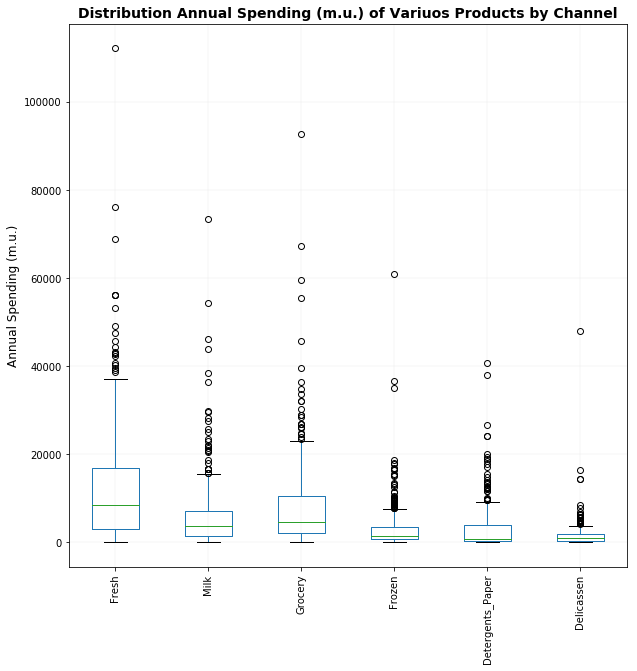

In [17]:
customer.plot(kind='box', legend=True,rot=90,fontsize=10,figsize=(10,10))
plt.title('Distribution Annual Spending (m.u.) of Variuos Products by Channel', weight='bold', size=14)
plt.grid(True, which='major',linestyle='-', linewidth=0.1 )
plt.ylabel('Annual Spending (m.u.)',size=12)
plt.show()

In [18]:
#Task 2: Exploring Each column

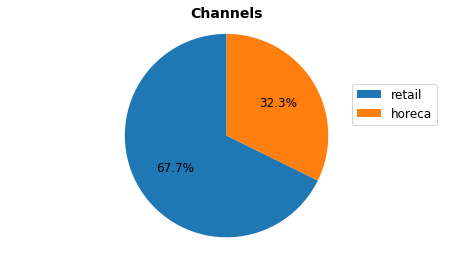

In [19]:
customer['Channel'].value_counts().plot(kind='pie',fontsize=12,autopct='%.1f%%',pctdistance=0.6, startangle=90,labels=None) 
plt.ylabel('')
plt.axis('equal')
plt.legend(labels=customer['Channel'].unique(),bbox_to_anchor=(1,0.6), loc="center right", fontsize=12,bbox_transform=plt.gcf().transFigure)
plt.title('Channels', weight='bold', size=14)
plt.subplots_adjust(left=0.0, bottom=0.1, right=1)
plt.show()

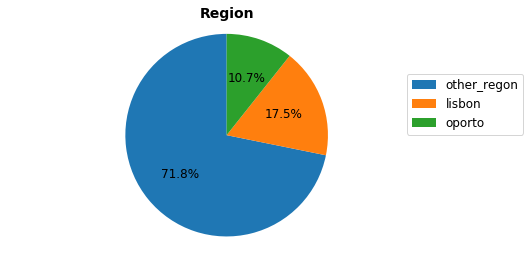

In [20]:
customer['Region'].value_counts().plot(kind='pie',fontsize=12,autopct='%.1f%%',pctdistance=0.6, startangle=90,labels=None) 
plt.ylabel('')
plt.axis('equal')
plt.legend(labels=customer['Region'].unique(),bbox_to_anchor=(1.2,0.6), loc="center right", fontsize=12,bbox_transform=plt.gcf().transFigure)
plt.title('Region', weight='bold', size=14)
plt.subplots_adjust(left=0.0, bottom=0.1, right=1)
plt.show()

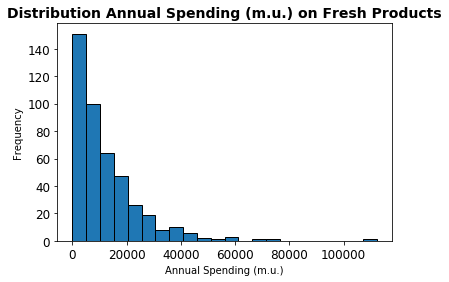

In [21]:
customer['Fresh'].plot(kind='hist',bins=22,edgecolor='black', linewidth=1.0, fontsize=12)
plt.title('Distribution Annual Spending (m.u.) on Fresh Products', weight='bold', size=14)
plt.xlabel('Annual Spending (m.u.)')
plt.ylabel('Frequency')
plt.show()

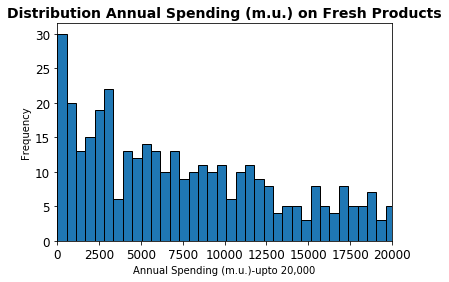

In [22]:
customer['Fresh'].plot(kind='hist',bins=200,edgecolor='black', linewidth=1.0, fontsize=12)
plt.title('Distribution Annual Spending (m.u.) on Fresh Products', weight='bold', size=14)
plt.xlabel('Annual Spending (m.u.)-upto 20,000')
plt.ylabel('Frequency')
plt.xlim(xmin=0, xmax = 20000)
plt.show()

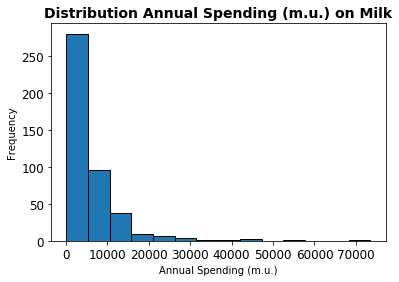

In [23]:
customer['Milk'].plot(kind='hist',bins=14,edgecolor='black', linewidth=1.0, fontsize=12)
plt.title('Distribution Annual Spending (m.u.) on Milk', weight='bold', size=14)
plt.xlabel('Annual Spending (m.u.)')
plt.ylabel('Frequency')
plt.show()

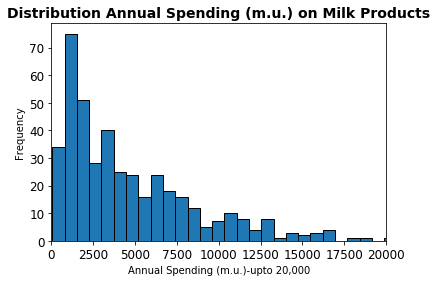

In [24]:
customer['Milk'].plot(kind='hist',bins=100,edgecolor='black', linewidth=1.0, fontsize=12)
plt.title('Distribution Annual Spending (m.u.) on Milk Products', weight='bold', size=14)
plt.xlabel('Annual Spending (m.u.)-upto 20,000')
plt.ylabel('Frequency')
plt.xlim(xmin=0, xmax = 20000)
plt.show()

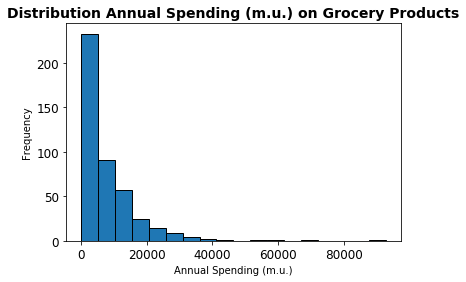

In [25]:
customer['Grocery'].plot(kind='hist',bins=18,edgecolor='black', linewidth=1.0, fontsize=12)
plt.title('Distribution Annual Spending (m.u.) on Grocery Products', weight='bold', size=14)
plt.xlabel('Annual Spending (m.u.)')
plt.ylabel('Frequency')
plt.show()

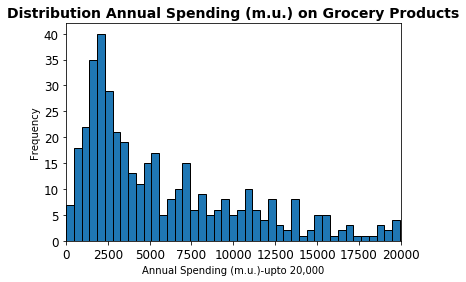

In [26]:
customer['Grocery'].plot(kind='hist',bins=200,edgecolor='black', linewidth=1.0, fontsize=12)
plt.title('Distribution Annual Spending (m.u.) on Grocery Products', weight='bold', size=14)
plt.xlabel('Annual Spending (m.u.)-upto 20,000')
plt.ylabel('Frequency')
plt.xlim(xmin=0, xmax = 20000)
plt.show()

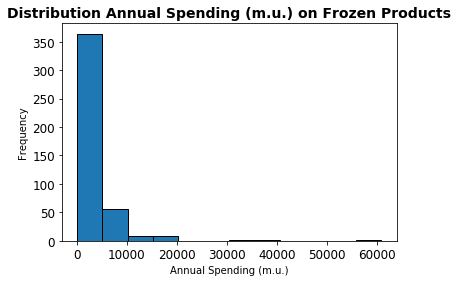

In [27]:
customer['Frozen'].plot(kind='hist',bins=12,edgecolor='black', linewidth=1.0, fontsize=12)
plt.title('Distribution Annual Spending (m.u.) on Frozen Products', weight='bold', size=14)
plt.xlabel('Annual Spending (m.u.)')
plt.ylabel('Frequency')
plt.show()

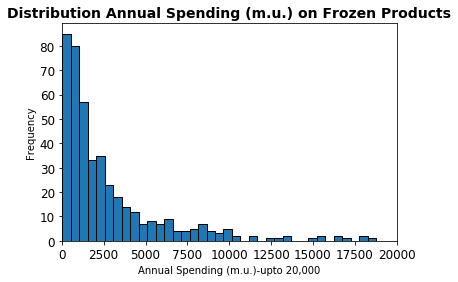

In [28]:
customer['Frozen'].plot(kind='hist',bins=120,edgecolor='black', linewidth=1.0, fontsize=12)
plt.title('Distribution Annual Spending (m.u.) on Frozen Products', weight='bold', size=14)
plt.xlabel('Annual Spending (m.u.)-upto 20,000')
plt.ylabel('Frequency')
plt.xlim(xmin=0, xmax = 20000)
plt.show()

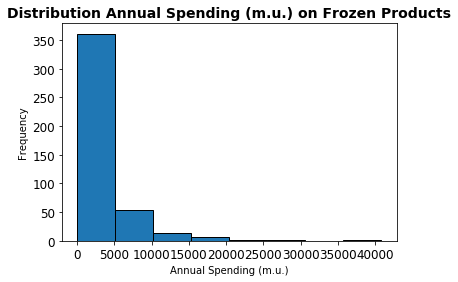

In [29]:
customer['Detergents_Paper'].plot(kind='hist',bins=8,edgecolor='black', linewidth=1.0, fontsize=12)
plt.title('Distribution Annual Spending (m.u.) on Frozen Products', weight='bold', size=14)
plt.xlabel('Annual Spending (m.u.)')
plt.ylabel('Frequency')
plt.show()

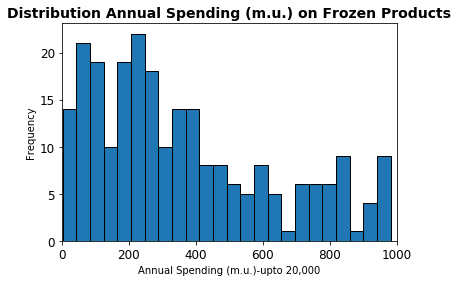

In [30]:
customer['Detergents_Paper'].plot(kind='hist',bins=1000,edgecolor='black', linewidth=1.0, fontsize=12)
plt.title('Distribution Annual Spending (m.u.) on Frozen Products', weight='bold', size=14)
plt.xlabel('Annual Spending (m.u.)-upto 20,000')
plt.ylabel('Frequency')
plt.xlim(xmin=0, xmax = 1000)
plt.show()

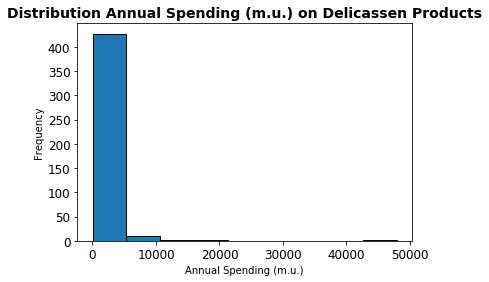

In [31]:
customer['Delicassen'].plot(kind='hist',bins=9,edgecolor='black', linewidth=1.0, fontsize=12)
plt.title('Distribution Annual Spending (m.u.) on Delicassen Products', weight='bold', size=14)
plt.xlabel('Annual Spending (m.u.)')
plt.ylabel('Frequency')
plt.show()

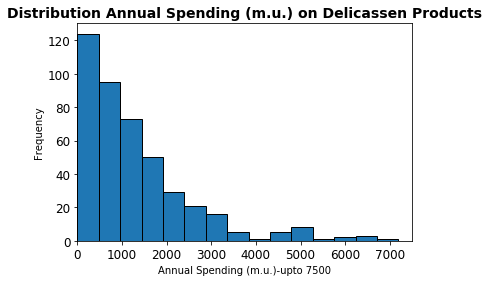

In [32]:
customer['Delicassen'].plot(kind='hist',bins=100,edgecolor='black', linewidth=1.0, fontsize=12)
plt.title('Distribution Annual Spending (m.u.) on Delicassen Products', weight='bold', size=14)
plt.xlabel('Annual Spending (m.u.)-upto 7500')
plt.ylabel('Frequency')
plt.xlim(xmin=0, xmax = 7500)
plt.show()

In [33]:
# Task 2: Explore relationship between attributes

In [34]:
from pandas.plotting import scatter_matrix

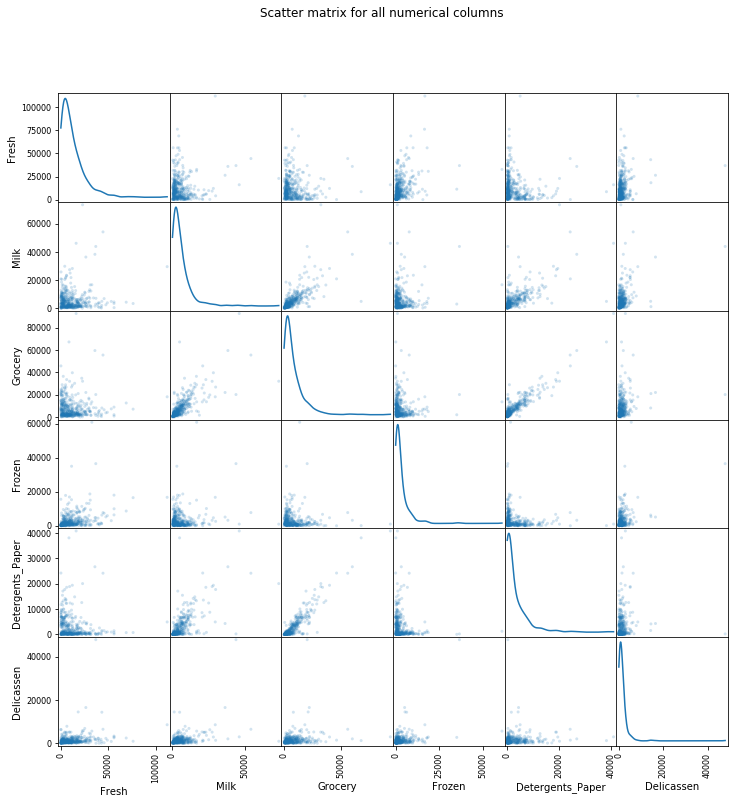

In [35]:
scatter_matrix(customer,alpha=0.2,figsize=(12,12),diagonal='kde')
plt.suptitle('Scatter matrix for all numerical columns')
plt.show()

In [36]:
# Explore relationship between Region and Channel

In [37]:
region_counts=customer.dropna()['Region'].value_counts()

In [38]:
mask_lisbon=customer['Region']=="lisbon"
mask_oporto=customer['Region']=="oporto"
mask_other=customer['Region']=="other_regon"

In [39]:
lisbon_channel=customer.dropna().loc[mask_lisbon,'Channel'].value_counts()
oporto_channel=customer.dropna().loc[mask_oporto,'Channel'].value_counts()
other_channel=customer.dropna().loc[mask_other,'Channel'].value_counts()

In [40]:
rate_lisbon=[lisbon_channel["horeca"]/float(region_counts['lisbon']),lisbon_channel["retail"]/float(region_counts['lisbon'])]
rate_oporto=[oporto_channel["horeca"]/float(region_counts['oporto']),oporto_channel["retail"]/float(region_counts['oporto'])]
rate_other=[other_channel["horeca"]/float(region_counts['other_regon']),other_channel["retail"]/float(region_counts['other_regon'])]

In [41]:
channel_data=[rate_lisbon,rate_oporto,rate_other]

In [42]:
channel_index=['Lisbon','Oporto','Other']

In [43]:
channel_region = pd.DataFrame(channel_data, index=channel_index)

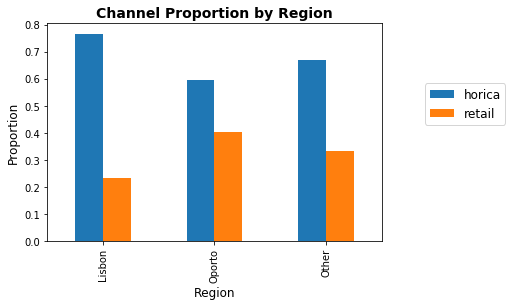

In [44]:
channel_region.plot(kind='bar', fontsize=10)
plt.title('Channel Proportion by Region', weight='bold', size=14)
plt.xlabel('Region',size=12)
plt.ylabel('Proportion',size=12)
plt.legend(labels=('horica','retail'),bbox_to_anchor=(1.2,0.6), loc="center right", fontsize=12,bbox_transform=plt.gcf().transFigure)
plt.show()

In [45]:
#Explore relationship between Channel and products

In [46]:
products_by_channel=customer.groupby('Channel').sum()

In [47]:
products_by_channel

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,,,,,,
horeca,4015717.0,1028614.0,1180717.0,1116979.0,235587.0,421955.0
retail,1264414.0,1521743.0,2317845.0,234671.0,1032270.0,248988.0


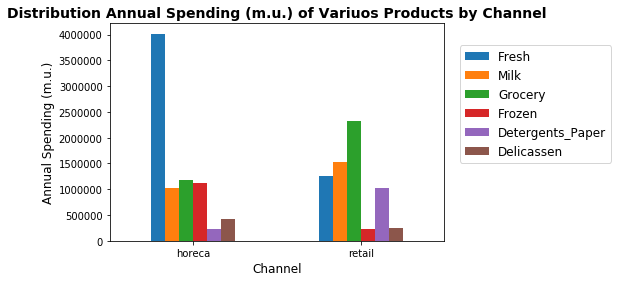

In [48]:
products_by_channel.plot(kind='bar', fontsize=10,rot=0)
plt.title('Distribution Annual Spending (m.u.) of Variuos Products by Channel', weight='bold', size=14)
plt.xlabel('Channel',size=12)
plt.ylabel('Annual Spending (m.u.)',size=12)
plt.legend(labels=products_by_channel.columns,bbox_to_anchor=(1.3,0.6), loc="center right", fontsize=12,bbox_transform=plt.gcf().transFigure)
plt.show()

In [49]:
#explore relationship between Region and products

In [50]:
products_by_region=customer.groupby('Region').sum()

In [51]:
products_by_region

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Region,,,,,,
lisbon,854833.0,422454.0,570037.0,231026.0,204136.0,104327.0
oporto,464721.0,239144.0,433274.0,190132.0,173311.0,54506.0
other_regon,3960577.0,1888759.0,2495251.0,930492.0,890410.0,512110.0


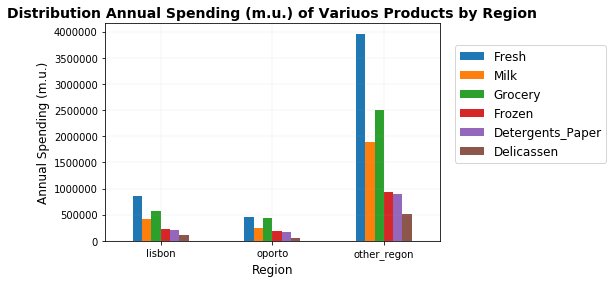

In [52]:
products_by_region.plot(kind='bar', fontsize=10,rot=0)
plt.title('Distribution Annual Spending (m.u.) of Variuos Products by Region', weight='bold', size=14)
plt.xlabel('Region',size=12)
plt.ylabel('Annual Spending (m.u.)',size=12)
plt.grid(True, which='major', linewidth=0.1 )
plt.legend(labels=products_by_region.columns,bbox_to_anchor=(1.3,0.6), loc="center right", fontsize=12,bbox_transform=plt.gcf().transFigure)
plt.show()

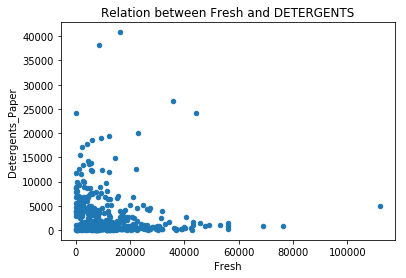

In [53]:
customer.plot(kind='scatter', x='Fresh', y='Detergents_Paper', title='Relation between Fresh and DETERGENTS', legend=True)
plt.show()

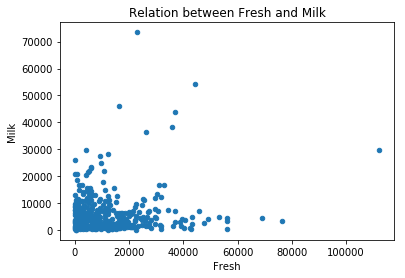

In [54]:
customer.plot(kind='scatter', x='Fresh', y='Milk', title='Relation between Fresh and Milk', legend=True)
plt.show()

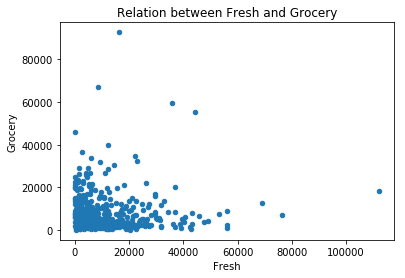

In [55]:
customer.plot(kind='scatter', x='Fresh', y='Grocery', title='Relation between Fresh and Grocery', legend=True)
plt.show()

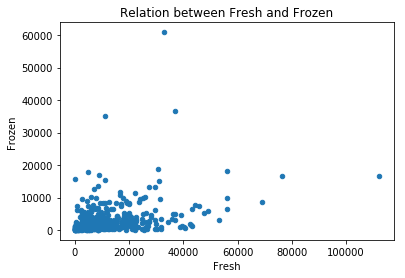

In [56]:
customer.plot(kind='scatter', x='Fresh', y='Frozen', title='Relation between Fresh and Frozen', legend=True)
plt.show()

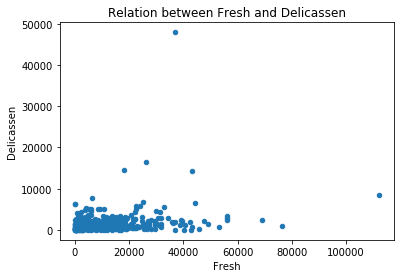

In [57]:
customer.plot(kind='scatter', x='Fresh', y='Delicassen', title='Relation between Fresh and Delicassen', legend=True)
plt.show()

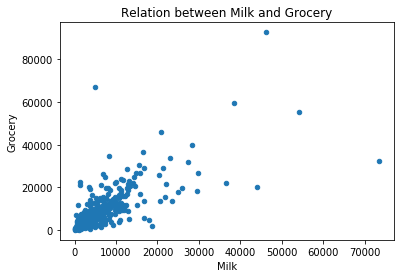

In [58]:
customer.plot(kind='scatter', x='Milk', y='Grocery', title='Relation between Milk and Grocery', legend=True)
plt.show()

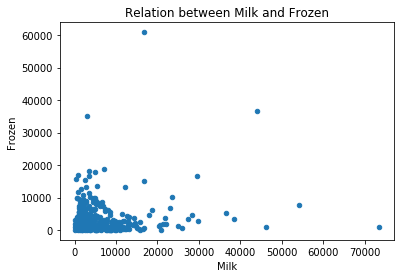

In [59]:
customer.plot(kind='scatter', x='Milk', y='Frozen', title='Relation between Milk and Frozen', legend=True)
plt.show()

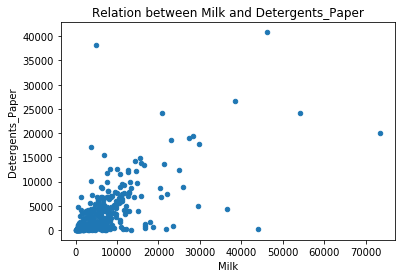

In [60]:
customer.plot(kind='scatter', x='Milk', y='Detergents_Paper', title='Relation between Milk and Detergents_Paper', legend=True)
plt.show()

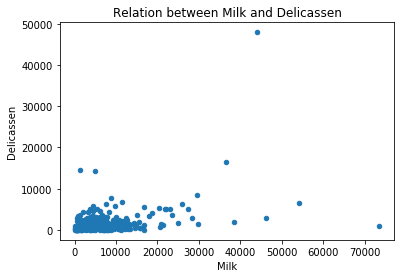

In [61]:
customer.plot(kind='scatter', x='Milk', y='Delicassen', title='Relation between Milk and Delicassen', legend=True)
plt.show()

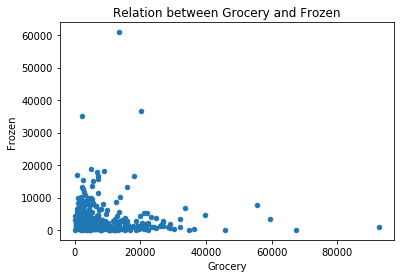

In [62]:
customer.plot(kind='scatter', x='Grocery', y='Frozen', title='Relation between Grocery and Frozen', legend=True)
plt.show()

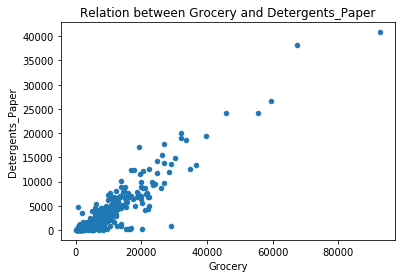

In [63]:
customer.plot(kind='scatter', x='Grocery', y='Detergents_Paper', title='Relation between Grocery and Detergents_Paper', legend=True)
plt.show()

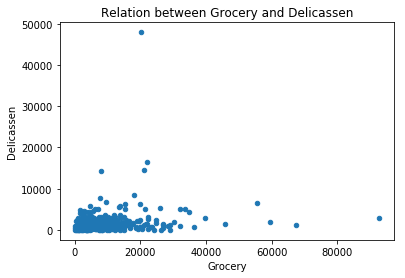

In [64]:
customer.plot(kind='scatter', x='Grocery', y='Delicassen', title='Relation between Grocery and Delicassen', legend=True)
plt.show()

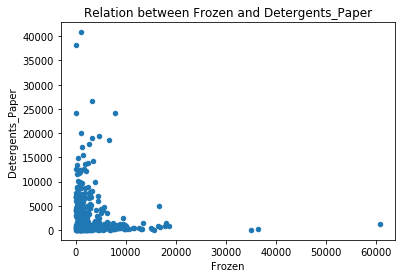

In [65]:
customer.plot(kind='scatter', x='Frozen', y='Detergents_Paper', title='Relation between Frozen and Detergents_Paper', legend=True)
plt.show()

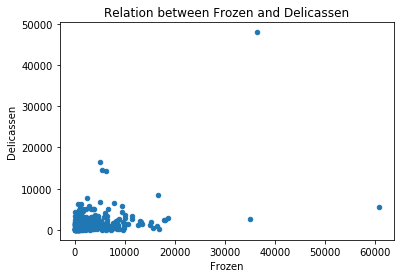

In [66]:
customer.plot(kind='scatter', x='Frozen', y='Delicassen', title='Relation between Frozen and Delicassen', legend=True)
plt.show()

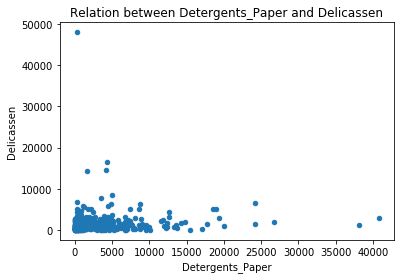

In [67]:
customer.plot(kind='scatter', x='Detergents_Paper', y='Delicassen', title='Relation between Detergents_Paper and Delicassen', legend=True)
plt.show()

In [68]:
#Task2: Data Modelling (Clustering)

In [69]:
#Clustering KMeans

In [70]:
#Channel and Region colums can be dropped as those variables are not usefull for clustering.
cust=customer.drop(['Region', 'Channel'], axis = 1)

In [71]:
import sklearn
from sklearn import cluster

In [72]:
#Finding optimal number of clusters: Elbow Analysis

In [73]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report

In [74]:
cust.columns

Index([u'Fresh', u'Milk', u'Grocery', u'Frozen', u'Detergents_Paper',
       u'Delicassen'],
      dtype='object')

In [75]:
Y = cust[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper','Delicassen']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y_scaled = scaler.fit_transform( Y )

##

cluster_range = range( 1, 15 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( Y_scaled )
  cluster_errors.append( clusters.inertia_ )

##
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

##
clusters_df[0:10]

,cluster_errors,num_clusters
0,2640.000000,1
1,1954.119044,2
2,1608.431149,3
3,1322.512213,4
4,1058.771253,5
5,934.784496,6
6,828.504120,7
7,743.247207,8
8,663.165379,9
9,602.501555,10


Text(0.5,0,u'number of clusters')

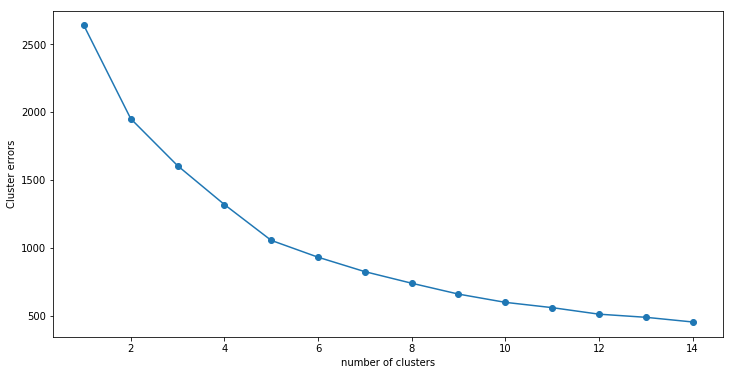

In [76]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.ylabel('Cluster errors')
plt.xlabel('number of clusters')



In [77]:
#The elbow diagram shows that the after 5, the curve remain less changing. 
#Therefore 5 can be the optimal number of clusters for this dataset. 
#however 2,3 & 5 have been considered for data set training under the clustering 

In [78]:
X=cust.copy()
print X[:5]

     Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  12669.0  9656.0   7561.0   214.0            2674.0      1338.0
1   7057.0  9810.0   9568.0  1762.0            3293.0      1776.0
2   6353.0  8808.0   7684.0  2405.0            3516.0      7844.0
3  13265.0  1196.0   4221.0  6404.0             507.0      1788.0
4  22615.0  5410.0   7198.0  3915.0            1777.0      5185.0


In [79]:
#Training model: starting with k=5
n_clusters=5
model=cluster.KMeans(n_clusters,random_state=14,n_init=5,init='random')
results=model.fit(X)
X["cluster"]=results.predict(X)
X.head()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0,4
1,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0,4
2,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0,4
3,13265.0,1196.0,4221.0,6404.0,507.0,1788.0,4
4,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0,2


In [80]:
color_theme=np.array(['darkgray','lightsalmon','powerblue','blue','gray'])
labels_2=results.labels_

In [81]:
X.groupby('cluster').mean().round(0)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0,48777.0,6607.0,6198.0,9463.0,932.0,4435.0
1,4654.0,11296.0,17856.0,1433.0,7794.0,1574.0
2,21200.0,3886.0,5139.0,4120.0,1132.0,1690.0
3,18192.0,35362.0,48052.0,3308.0,23535.0,4461.0
4,6089.0,3253.0,4020.0,2475.0,1182.0,980.0


In [82]:
#Training model: k=4
n_clusters=4
model=cluster.KMeans(n_clusters,random_state=14,n_init=5,init='random')
results=model.fit(X)
X["cluster"]=results.predict(X)
X.groupby('cluster').mean().round(0)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0,5473.0,4108.0,5593.0,2255.0,1984.0,1051.0
1,49331.0,6823.0,6339.0,9666.0,951.0,4558.0
2,20801.0,3794.0,5013.0,4023.0,1120.0,1648.0
3,8150.0,18716.0,27757.0,2035.0,12523.0,2282.0


In [83]:
#Training model: k=3
n_clusters=3
model=cluster.KMeans(n_clusters,random_state=14,n_init=5,init='random')
results=model.fit(X)
X["cluster"]=results.predict(X)
X.groupby('cluster').mean().round(0)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0,36156.0,6124.0,6367.0,6811.0,1050.0,3090.0
1,7752.0,17911.0,27038.0,1971.0,12105.0,2186.0
2,8342.0,3780.0,5152.0,2577.0,1721.0,1137.0


In [84]:
#Training model: k=2
n_clusters=2
model=cluster.KMeans(n_clusters,random_state=14,n_init=5,init='random')
results=model.fit(X)
X["cluster"]=results.predict(X)
X.groupby('cluster').mean().round(0)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0,35401.0,9514.0,10346.0,6463.0,2933.0,3317.0
1,7944.0,5152.0,7536.0,2484.0,2873.0,1214.0


In [85]:
#by analysing the clustering models, K=5 is the optimal

In [86]:
n_clusters=5
model=cluster.KMeans(n_clusters,random_state=14,n_init=5,init='random')
results=model.fit(X)
X["cluster"]=results.predict(X)
X.groupby('cluster').mean().round(0)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0,48777.0,6607.0,6198.0,9463.0,932.0,4435.0
1,4654.0,11296.0,17856.0,1433.0,7794.0,1574.0
2,21200.0,3886.0,5139.0,4120.0,1132.0,1690.0
3,18192.0,35362.0,48052.0,3308.0,23535.0,4461.0
4,6089.0,3253.0,4020.0,2475.0,1182.0,980.0


In [87]:
#Constructing confusing matrix

In [88]:
X["Channel"]=customer.Channel

In [89]:
X["c"]="lookatmeiamimportant"

In [90]:
print X[:5]

     Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicassen  cluster  \
0  12669.0  9656.0   7561.0   214.0            2674.0      1338.0        4   
1   7057.0  9810.0   9568.0  1762.0            3293.0      1776.0        4   
2   6353.0  8808.0   7684.0  2405.0            3516.0      7844.0        4   
3  13265.0  1196.0   4221.0  6404.0             507.0      1788.0        4   
4  22615.0  5410.0   7198.0  3915.0            1777.0      5185.0        2   

  Channel                     c  
0  retail  lookatmeiamimportant  
1  retail  lookatmeiamimportant  
2  retail  lookatmeiamimportant  
3  horeca  lookatmeiamimportant  
4  retail  lookatmeiamimportant  


In [91]:
classification_result = X[["cluster", "Channel", "c"]].groupby(["cluster", "Channel"]).agg("count")
print (classification_result)

                   c
cluster Channel     
0       horeca    22
        retail     2
1       horeca     7
        retail    74
2       horeca    83
        retail    21
3       retail    10
4       horeca   186
        retail    35


In [92]:
##Clustering DBSCAN

In [93]:
Y=cust.copy()

In [94]:
from sklearn.neighbors import NearestNeighbors

In [95]:
nbrs = NearestNeighbors().fit(Y)

In [96]:
distances, indices = nbrs.kneighbors(Y, 20)

In [97]:
kDis = distances[:, 10]

In [98]:
kDis.sort()

In [99]:
kDis = kDis[range(len(kDis)-1, 0, -1)]

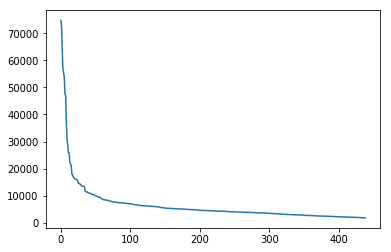

In [100]:
plt.plot(range(0,len(kDis)), kDis)
plt.show()

In [101]:
from sklearn.cluster import DBSCAN

In [102]:
model1=cluster.DBSCAN(eps=11000)
results1=model1.fit(Y)
results1

DBSCAN(algorithm='auto', eps=11000, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [103]:
labels_2=results1.labels_

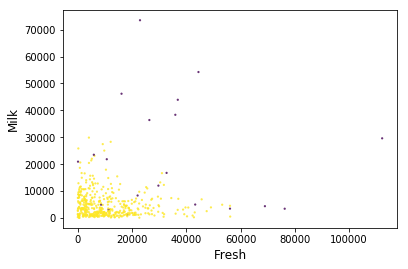

In [104]:
plt.scatter(Y.iloc[:, 0], Y.iloc[:, 1], c=labels_2, alpha = 0.8, s= 5.0, lw= 0)
plt.xlabel("Fresh",size=12)
plt.ylabel('Milk',size=12)
plt.show()

In [105]:
Y["cluster1"]=results1.labels_
Y["Channel"]=customer.Channel
Y["c"]="lookatmeiamimportant"
Y.head(5)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster1,Channel,c
0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0,0,retail,lookatmeiamimportant
1,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0,0,retail,lookatmeiamimportant
2,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0,0,retail,lookatmeiamimportant
3,13265.0,1196.0,4221.0,6404.0,507.0,1788.0,0,horeca,lookatmeiamimportant
4,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0,0,retail,lookatmeiamimportant


In [106]:
classification_result = Y[["cluster1", "Channel", "c"]].groupby(["cluster1", "Channel"]).agg("count")
print (classification_result)

                    c
cluster1 Channel     
-1       horeca    12
         retail     8
 0       horeca   286
         retail   134


In [107]:
Y.groupby('cluster1').mean().round(0)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster1,,,,,,
-1,33933.0,22582.0,28345.0,12472.0,10381.0,7316.0
0,10956.0,4997.0,6980.0,2624.0,2524.0,1249.0
